# Random Forests

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [3]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### Model & Training

In [8]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [18]:
dir(rf_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_

In [22]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
File:        c:\users\ertug\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information

In [9]:
y_pred = rf_model.predict(X_test)

In [10]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5053822864043174

In [11]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [12]:
r2_score(y_test, y_pred)

-0.12822847682119232

In [13]:
confusion_matrix(y_test, y_pred)

array([[122,  29],
       [ 30,  50]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [16]:
rf_model.predict_proba(X_test)[:10]

array([[0.56, 0.44],
       [0.78, 0.22],
       [0.88, 0.12],
       [0.79, 0.21],
       [0.54, 0.46],
       [0.44, 0.56],
       [1.  , 0.  ],
       [0.3 , 0.7 ],
       [0.4 , 0.6 ],
       [0.44, 0.56]])

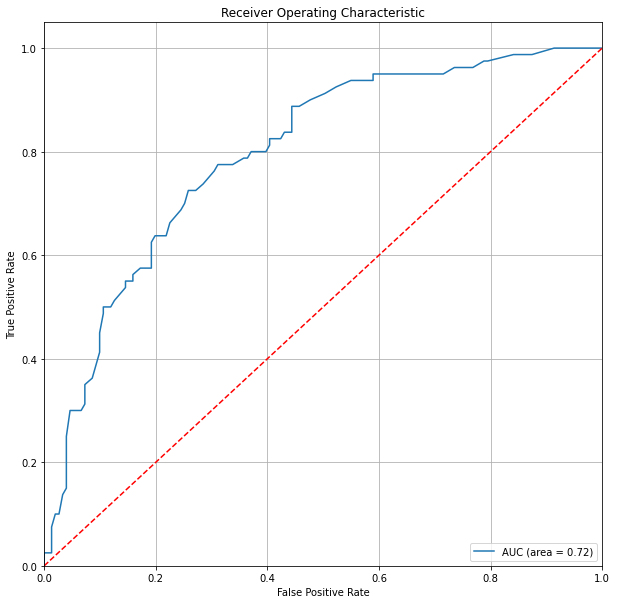

In [17]:
logit_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("RF_ROC")
plt.grid(1)
plt.show()

### MODEL TUNING

In [19]:
rf_model = RandomForestClassifier()

In [21]:
X_train.shape  # 537 veri ve 8 features

(537, 8)

In [24]:
rf_params = {"n_estimators": [100, 200, 500, 1000, 2000],
             "max_features": [3, 5, 7, 8],
             "min_samples_split": [2, 5, 10, 20]} 
                               # Kullanılacak olan ağaç sayısı --> "n_estimators"
                               # bölünmelerde göz önünde bulundurulması gereken maximum değişkenler --> "max_features"
                               # Ağacın hierarşik yapısını belirlemede kullanılır. 
                               # The minimum number of samples required to split an internal node --> "min_samples_split" --> overfitting engellenir!

In [25]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 25.4min finished


In [26]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 10, 'n_estimators': 1000}

In [27]:
rf_cv_model.best_score_

0.7838923829489868

In [28]:
rf_tuned = RandomForestClassifier(n_estimators=rf_cv_model.best_params_.get("n_estimators"),
                                  max_features=rf_cv_model.best_params_.get("max_features"),
                                  min_samples_split=rf_cv_model.best_params_.get("min_samples_split")).fit(X_train,
                                                                                                           y_train)

In [30]:
y_pred = rf_tuned.predict(X_test)

In [31]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.496742636335202

In [32]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [33]:
r2_score(y_test, y_pred)

-0.08998344370860956

In [34]:
confusion_matrix(y_test, y_pred)

array([[118,  33],
       [ 24,  56]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       151
           1       0.63      0.70      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.76       231



In [36]:
rf_tuned.predict_proba(X_test)[:10]

array([[4.57146018e-01, 5.42853982e-01],
       [7.61960022e-01, 2.38039978e-01],
       [9.11348866e-01, 8.86511342e-02],
       [8.72981260e-01, 1.27018740e-01],
       [6.09523368e-01, 3.90476632e-01],
       [3.74571310e-01, 6.25428690e-01],
       [9.99468182e-01, 5.31818182e-04],
       [3.06301002e-01, 6.93698998e-01],
       [4.60336082e-01, 5.39663918e-01],
       [3.32900385e-01, 6.67099615e-01]])

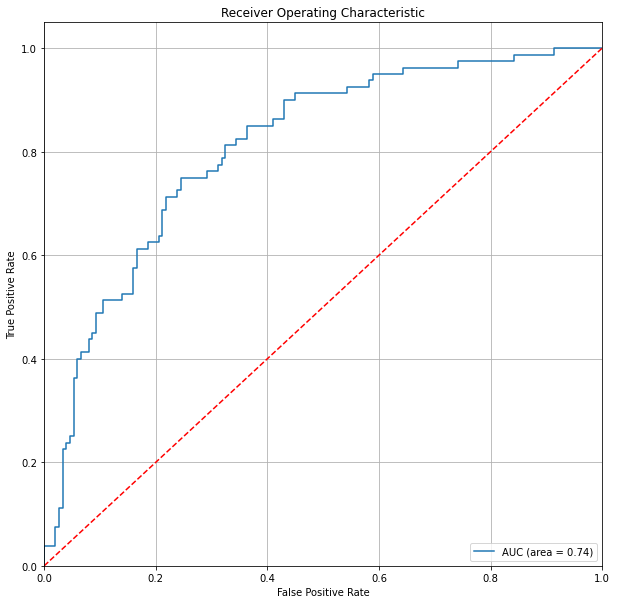

In [37]:
logit_roc_auc = roc_auc_score(y_test, rf_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("RF_TUNED_ROC")
plt.grid(1)
plt.show()

### DEĞİŞKEN ÖNEM DÜZEYLERİ

In [45]:
rf_tuned.feature_importances_

array([0.04780702, 0.37729101, 0.06380252, 0.04292016, 0.04821147,
       0.17640998, 0.0974389 , 0.14611894])

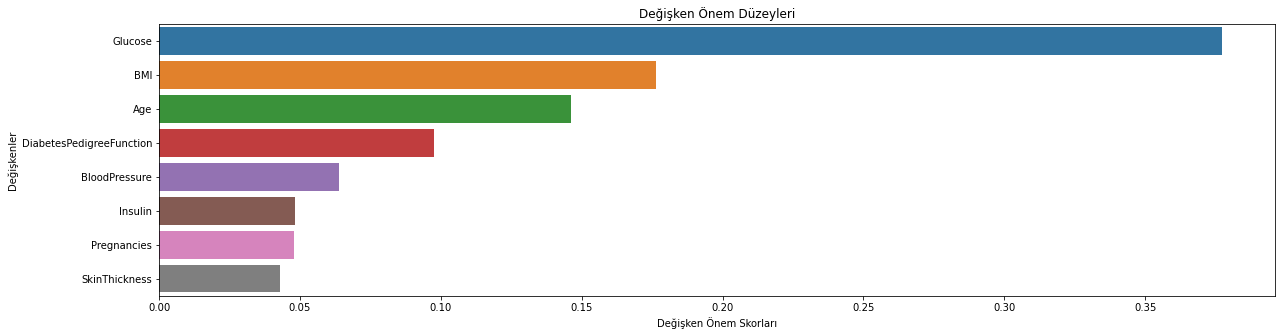

In [42]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");